<a href="https://colab.research.google.com/github/GabrielAzpitarte/Machine-learning-projects/blob/main/School_grades_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importation et lecture du fichier
Ces défis utilisent le projet kaggle suivant:

https://www.kaggle.com/datasets/dipam7/student-grade-prediction

le csv correspondant est hébergé sur le site ressources pour éviter de devoir demander au makers de créer un compte sur kaggle:

https://ressources.magicmakers.fr/wp-content/uploads/2022/09/student-mat.csv

In [ ]:
!wget "https://ressources.magicmakers.fr/wp-content/uploads/2022/09/student-mat.csv"

--2023-05-10 14:58:20--  https://ressources.magicmakers.fr/wp-content/uploads/2022/09/student-mat.csv
Resolving ressources.magicmakers.fr (ressources.magicmakers.fr)... 213.186.33.3, 2001:41d0:1:1b00:213:186:33:3
Connecting to ressources.magicmakers.fr (ressources.magicmakers.fr)|213.186.33.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 41983 (41K) [text/csv]
Saving to: ‘student-mat.csv.3’

student-mat.csv.3   100%[===================>]  41.00K  --.-KB/s    in 0.1s    

2023-05-10 14:58:21 (327 KB/s) - ‘student-mat.csv.3’ saved [41983/41983]



In [ ]:
import pandas as pd

donnees_etudiant = pd.read_csv("student-mat.csv")
donnees_manip = pd.read_csv("student-mat.csv")

for colonne in donnees_etudiant.columns :
  print(colonne, ":", donnees_etudiant[colonne].unique())

school : ['GP' 'MS']
sex : ['F' 'M']
age : [18 17 15 16 19 22 20 21]
address : ['U' 'R']
famsize : ['GT3' 'LE3']
Pstatus : ['A' 'T']
Medu : [4 1 3 2 0]
Fedu : [4 1 2 3 0]
Mjob : ['at_home' 'health' 'other' 'services' 'teacher']
Fjob : ['teacher' 'other' 'services' 'health' 'at_home']
reason : ['course' 'other' 'home' 'reputation']
guardian : ['mother' 'father' 'other']
traveltime : [2 1 3 4]
studytime : [2 3 1 4]
failures : [0 3 2 1]
schoolsup : ['yes' 'no']
famsup : ['no' 'yes']
paid : ['no' 'yes']
activities : ['no' 'yes']
nursery : ['yes' 'no']
higher : ['yes' 'no']
internet : ['no' 'yes']
romantic : ['no' 'yes']
famrel : [4 5 3 1 2]
freetime : [3 2 4 1 5]
goout : [4 3 2 1 5]
Dalc : [1 2 5 3 4]
Walc : [1 3 2 4 5]
health : [3 5 1 2 4]
absences : [ 6  4 10  2  0 16 14  7  8 25 12 54 18 26 20 56 24 28  5 13 15 22  3 21
  1 75 30 19  9 11 38 40 23 17]
G1 : [ 5  7 15  6 12 16 14 10 13  8 11  9 17 19 18  4  3]
G2 : [ 6  5  8 14 10 15 12 18 16 13  9 11  7 19 17  4  0]
G3 : [ 6 10 15 11 19 

#Un premier réseau de neurones
On va créer un réseau de neurones qui prédira la note du 3ème trimestre.

Pour ce premier essai, nous ajouterons l'école et les notes des trimestres 1 et 2.

##Nettoyage et préparation des données
On va transformer la colonne "school" en nombre ("GP" 0 et "MS" 1).

In [ ]:
donnees_manip.loc[donnees_manip["school"] == "GP", ["school"]] = 0
donnees_manip.loc[donnees_manip["school"] == "MS", ["school"]] = 1

print(donnees_manip["school"].unique())


[0 1]


On va mettre en forme nos données pour les utiliser dans le réseau de neurones.

Pour faire ça, on va devoir créer des tenseurs numpy, X_train, Y_train, X_test et Y_test

*   X_train, ce sont les données en entrée pour l'entraînement
*   Y_train, ce sont les étiquettes
*   X_test et Y_test, ce sont les équivalents permettant d'évaluer le modèle avec des données différentes
*   Un tenseur, c'est un tableau à plusieurs dimensions

In [ ]:
#Pour créer et manipuler des tenseurs :
import numpy as np
#Pour manipuler les étiquettes :
from tensorflow.keras.utils import to_categorical
#Pour séparer les données d'entraînement et d'évaluation
from sklearn.model_selection import train_test_split

##On commence par gérer les sorties
Y = donnees_manip["G3"]

#on utilise la fonction to_categorical() pour transformer les données en vecteurs de probabilités
Y = to_categorical(Y, 21)

##On s'occupe des entrées
X = donnees_manip[["school","G1","G2"]]

#On va convertir en tenseur numpy avec la fonction np.asarray() et on va aussi convertir en nombre décimaux
X = np.asarray(X).astype("float32")

##Il nous reste plus qu'à splitter les données avec train_test_split()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

#On regarde si ça a bien marché :
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(316, 3)
(316, 21)
(79, 3)
(79, 21)


##Notre premier réseau de neurones

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

modele = Sequential()

#On va mettre une couche Dense de neurones en entrée
modele.add(Dense(16,input_shape=(3,),activation="relu"))

#on met ensuite une seconde couche intermédiaire
modele.add(Dense(32,activation="relu"))

#On va mettre une couche Dense de sortie
modele.add(Dense(21, activation="softmax"))

modele.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                64        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 21)                693       
                                                                 
Total params: 1,301
Trainable params: 1,301
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#On va paramétrer son entrainement :
modele.compile(optimizer="Adam",loss="categorical_crossentropy", metrics=["accuracy"])

#On va lancer l'entraînement
modele.fit(X_train, Y_train, batch_size = 16, epochs = 50, validation_data=(X_test,Y_test))

Epoch 1/50
20/20 [==============================] - 2s 27ms/step - loss: 4.3793 - accuracy: 0.0127 - val_loss: 3.7417 - val_accuracy: 0.0253
Epoch 2/50
20/20 [==============================] - 0s 7ms/step - loss: 3.3582 - accuracy: 0.0538 - val_loss: 3.1160 - val_accuracy: 0.0253
Epoch 3/50
20/20 [==============================] - 0s 7ms/step - loss: 2.9869 - accuracy: 0.0696 - val_loss: 2.9011 - val_accuracy: 0.0759
Epoch 4/50
20/20 [==============================] - 0s 9ms/step - loss: 2.8315 - accuracy: 0.1076 - val_loss: 2.7983 - val_accuracy: 0.0506
Epoch 5/50
20/20 [==============================] - 0s 7ms/step - loss: 2.7668 - accuracy: 0.0949 - val_loss: 2.7418 - val_accuracy: 0.1139
Epoch 6/50
20/20 [==============================] - 0s 8ms/step - loss: 2.7175 - accuracy: 0.0949 - val_loss: 2.6893 - val_accuracy: 0.0759
Epoch 7/50
20/20 [==============================] - 0s 10ms/step - loss: 2.6694 - accuracy: 0.1171 - val_loss: 2.6760 - val_accuracy: 0.1013
Epoch 8/50
20/20 [

In [ ]:
modele.save("result.h5")

##On va évaluer avec nos propres yeux !!!
On va utiliser Matplotlib pour faire nos figures

3/3 [==============================] - 0s 5ms/step


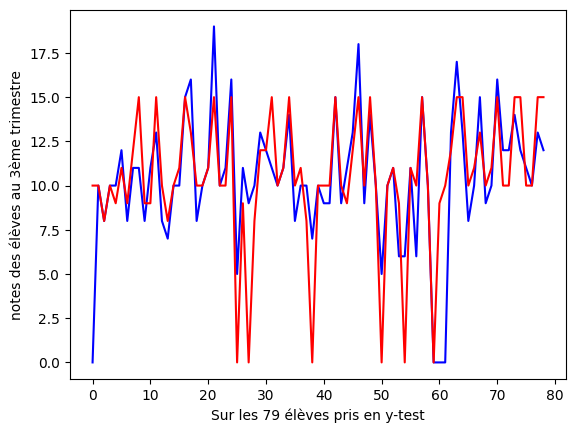

In [ ]:
from matplotlib import pyplot as plt
from keras.models import load_model

predicteur = load_model("result.h5")

X = X_test

Y = predicteur.predict(X)
notes_predites = np.argmax(Y, axis=1)
notes_reelles = np.argmax(Y_test,axis=1)

axe = range(X_test.shape[0])

plt.plot(axe, notes_reelles,'b',axe, notes_predites,'r')
plt.xlabel('Sur les 79 élèves pris en y-test')
plt.ylabel('notes des élèves au 3ème trimestre')
plt.show()

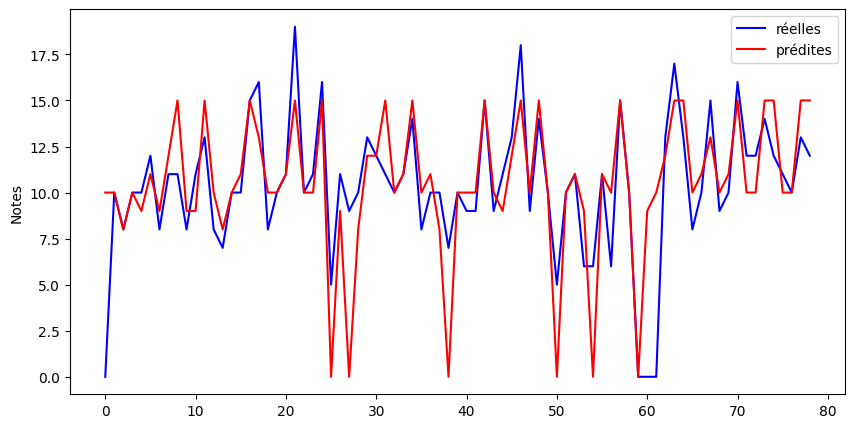

In [ ]:
plt.figure(dpi=100, figsize=(10,5))
plt.axes()
plt.ylabel("Notes")

plt.plot(notes_reelles,'b', notes_predites,'r')

plt.legend(["réelles","prédites"])

plt.savefig("mlp-results.png")
plt.show()

#On va améliorer notre modèle :
Première piste : diminuer le nombre de catégories.

Deuxième piste : mettre les paramètres les plus pertinents en entrée
*   Temps de travail
*   Temps de déplacement
*   Absences
*   école
*   santé
*   travail des parents
*   Est-ce-qu'un seul trimestre n'est pas suffisant ?
*   Est-ce-que les paramètres ne sont pas redondants ?
*   Enlever les données avec 0 au second et troisième trimestre

##On diminue le nombre de catégories de notes


In [ ]:
!wget "https://ressources.magicmakers.fr/wp-content/uploads/2022/09/student-mat.csv"

--2023-05-10 14:58:44--  https://ressources.magicmakers.fr/wp-content/uploads/2022/09/student-mat.csv
Resolving ressources.magicmakers.fr (ressources.magicmakers.fr)... 213.186.33.3, 2001:41d0:1:1b00:213:186:33:3
Connecting to ressources.magicmakers.fr (ressources.magicmakers.fr)|213.186.33.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 41983 (41K) [text/csv]
Saving to: ‘student-mat.csv.4’

student-mat.csv.4   100%[===================>]  41.00K  --.-KB/s    in 0.1s    

2023-05-10 14:58:44 (313 KB/s) - ‘student-mat.csv.4’ saved [41983/41983]



In [ ]:
import pandas as pd

donnees_etudiant = pd.read_csv("student-mat.csv")
donnees_manip = pd.read_csv("student-mat.csv")

On va regarder la répartition des notes sur un trimestre

<Axes: ylabel='Frequency'>

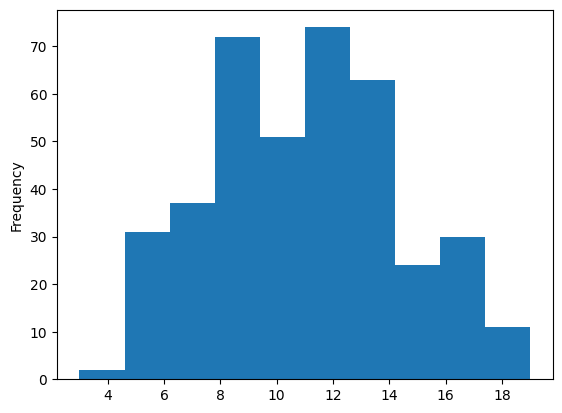

In [ ]:
donnees_etudiant["G1"].plot.hist()

<Axes: ylabel='Frequency'>

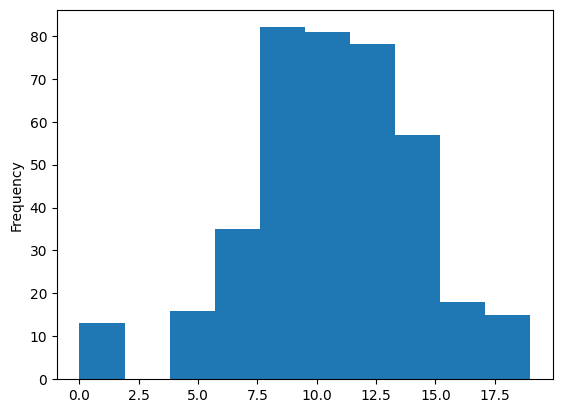

In [ ]:
donnees_etudiant["G2"].plot.hist()

<Axes: ylabel='Frequency'>

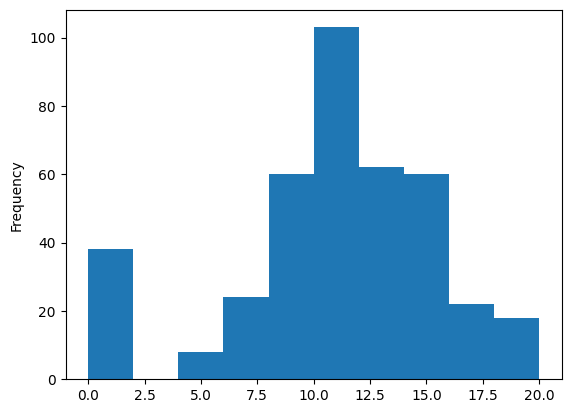

In [ ]:
donnees_etudiant["G3"].plot.hist()

Catégories
*   notes inférieures à 7 : 0
*   notes entre 7 et 10 : 1
*   notes entre 10 et 12 : 2
*   notes entre 12 et 14 : 3
*   notes entre 14 et 17 : 4
*   notes entre 17 et 20 : 5

In [ ]:
donnees_manip.loc[donnees_manip["G1"] <7, "G1"] = 0
donnees_manip.loc[donnees_manip["G2"] <7, "G2"] = 0
donnees_manip.loc[donnees_manip["G3"] <7, "G3"] = 0

donnees_manip.loc[(donnees_manip["G1"] >= 7) & (donnees_manip["G1"] < 10), "G1"] = 1
donnees_manip.loc[(donnees_manip["G2"] >= 7) & (donnees_manip["G2"] < 10), "G2"] = 1
donnees_manip.loc[(donnees_manip["G3"] >= 7) & (donnees_manip["G3"] < 10), "G3"] = 1

donnees_manip.loc[(donnees_manip["G1"] >= 10) & (donnees_manip["G1"] < 12), "G1"] = 2
donnees_manip.loc[(donnees_manip["G2"] >= 10) & (donnees_manip["G2"] < 12), "G2"] = 2
donnees_manip.loc[(donnees_manip["G3"] >= 10) & (donnees_manip["G3"] < 12), "G3"] = 2

donnees_manip.loc[(donnees_manip["G1"] >= 12) & (donnees_manip["G1"] < 14), "G1"] = 3
donnees_manip.loc[(donnees_manip["G2"] >= 12) & (donnees_manip["G2"] < 14), "G2"] = 3
donnees_manip.loc[(donnees_manip["G3"] >= 12) & (donnees_manip["G3"] < 14), "G3"] = 3

donnees_manip.loc[(donnees_manip["G1"] >= 14) & (donnees_manip["G1"] < 17), "G1"] = 4
donnees_manip.loc[(donnees_manip["G2"] >= 14) & (donnees_manip["G2"] < 17), "G2"] = 4
donnees_manip.loc[(donnees_manip["G3"] >= 14) & (donnees_manip["G3"] < 17), "G3"] = 4

donnees_manip.loc[donnees_manip["G1"] >= 17, "G1"] = 5
donnees_manip.loc[donnees_manip["G2"] >= 17, "G2"] = 5
donnees_manip.loc[donnees_manip["G3"] >= 17, "G3"] = 5

<Axes: ylabel='Frequency'>

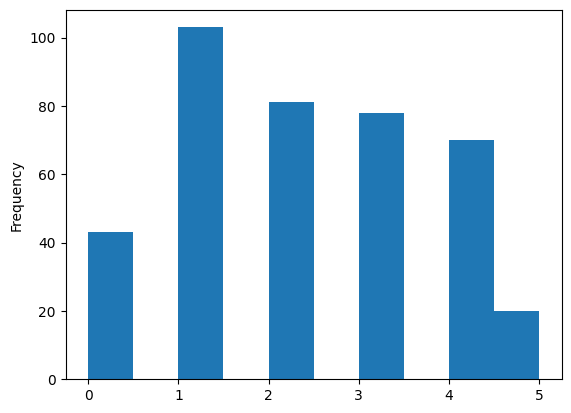

In [ ]:
donnees_manip["G2"].plot.hist()

#Réseau de neurones number 2

##Nettoyage et préparation des données
On va transformer la colonne "school" en nombre ("GP" 0 et "MS" 1).

[0 1]


<Axes: ylabel='Frequency'>

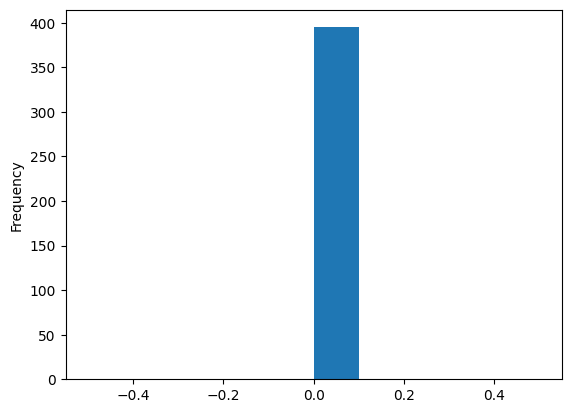

In [ ]:
donnees_manip.loc[donnees_manip["school"] == "GP", ["school"]] = 0
donnees_manip.loc[donnees_manip["school"] == "MS", ["school"]] = 1

print(donnees_manip["school"].unique())

donnees_manip.loc[donnees_manip["G1"] <7, "G1"] = 0
donnees_manip.loc[donnees_manip["G2"] <7, "G2"] = 0
donnees_manip.loc[donnees_manip["G3"] <7, "G3"] = 0

donnees_manip.loc[(donnees_manip["G1"] >= 7) & (donnees_manip["G1"] < 10), "G1"] = 1
donnees_manip.loc[(donnees_manip["G2"] >= 7) & (donnees_manip["G2"] < 10), "G2"] = 1
donnees_manip.loc[(donnees_manip["G3"] >= 7) & (donnees_manip["G3"] < 10), "G3"] = 1

donnees_manip.loc[(donnees_manip["G1"] >= 10) & (donnees_manip["G1"] < 12), "G1"] = 2
donnees_manip.loc[(donnees_manip["G2"] >= 10) & (donnees_manip["G2"] < 12), "G2"] = 2
donnees_manip.loc[(donnees_manip["G3"] >= 10) & (donnees_manip["G3"] < 12), "G3"] = 2

donnees_manip.loc[(donnees_manip["G1"] >= 12) & (donnees_manip["G1"] < 14), "G1"] = 3
donnees_manip.loc[(donnees_manip["G2"] >= 12) & (donnees_manip["G2"] < 14), "G2"] = 3
donnees_manip.loc[(donnees_manip["G3"] >= 12) & (donnees_manip["G3"] < 14), "G3"] = 3

donnees_manip.loc[(donnees_manip["G1"] >= 14) & (donnees_manip["G1"] < 17), "G1"] = 4
donnees_manip.loc[(donnees_manip["G2"] >= 14) & (donnees_manip["G2"] < 17), "G2"] = 4
donnees_manip.loc[(donnees_manip["G3"] >= 14) & (donnees_manip["G3"] < 17), "G3"] = 4

donnees_manip.loc[donnees_manip["G1"] >= 17, "G1"] = 5
donnees_manip.loc[donnees_manip["G2"] >= 17, "G2"] = 5
donnees_manip.loc[donnees_manip["G3"] >= 17, "G3"] = 5

donnees_manip["G2"].plot.hist()

On va mettre en forme nos données pour les utiliser dans le réseau de neurones.

Pour faire ça, on va devoir créer des tenseurs numpy, X_train, Y_train, X_test et Y_test

*   X_train, ce sont les données en entrée pour l'entraînement
*   Y_train, ce sont les étiquettes
*   X_test et Y_test, ce sont les équivalents permettant d'évaluer le modèle avec des données différentes
*   Un tenseur, c'est un tableau à plusieurs dimensions

In [ ]:
#Pour créer et manipuler des tenseurs :
import numpy as np
#Pour manipuler les étiquettes :
from tensorflow.keras.utils import to_categorical
#Pour séparer les données d'entraînement et d'évaluation
from sklearn.model_selection import train_test_split

##On commence par gérer les sorties
Y = donnees_manip["G3"]

#on utilise la fonction to_categorical() pour transformer les données en vecteurs de probabilités
Y = to_categorical(Y, 6)

##On s'occupe des entrées
X = donnees_manip[["school","G1","G2"]]

#On va convertir en tenseur numpy avec la fonction np.asarray() et on va aussi convertir en nombre décimaux
X = np.asarray(X).astype("float32")

##Il nous reste plus qu'à splitter les données avec train_test_split()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

#On regarde si ça a bien marché :
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(316, 3)
(316, 6)
(79, 3)
(79, 6)


##Notre premier réseau de neurones

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

modele = Sequential()

#On va mettre une couche Dense de neurones en entrée
modele.add(Dense(16,input_shape=(3,),activation="relu"))

#on met ensuite une seconde couche intermédiaire
modele.add(Dense(32,activation="relu"))

#On va mettre une couche Dense de sortie
modele.add(Dense(6, activation="softmax"))

modele.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                64        
                                                                 
 dense_4 (Dense)             (None, 32)                544       
                                                                 
 dense_5 (Dense)             (None, 6)                 198       
                                                                 
Total params: 806
Trainable params: 806
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#On va paramétrer son entrainement :
modele.compile(optimizer="Adam",loss="categorical_crossentropy", metrics=["accuracy"])

#On va lancer l'entraînement
modele.fit(X_train, Y_train, batch_size = 16, epochs = 50, validation_data=(X_test,Y_test))

Epoch 1/50
20/20 [==============================] - 2s 56ms/step - loss: 1.7648 - accuracy: 0.8987 - val_loss: 1.6989 - val_accuracy: 1.0000
Epoch 2/50
20/20 [==============================] - 0s 13ms/step - loss: 1.6391 - accuracy: 1.0000 - val_loss: 1.5517 - val_accuracy: 1.0000
Epoch 3/50
20/20 [==============================] - 0s 12ms/step - loss: 1.4750 - accuracy: 1.0000 - val_loss: 1.3516 - val_accuracy: 1.0000
Epoch 4/50
20/20 [==============================] - 0s 17ms/step - loss: 1.2501 - accuracy: 1.0000 - val_loss: 1.0825 - val_accuracy: 1.0000
Epoch 5/50
20/20 [==============================] - 0s 14ms/step - loss: 0.9623 - accuracy: 1.0000 - val_loss: 0.7759 - val_accuracy: 1.0000
Epoch 6/50
20/20 [==============================] - 0s 12ms/step - loss: 0.6566 - accuracy: 1.0000 - val_loss: 0.4881 - val_accuracy: 1.0000
Epoch 7/50
20/20 [==============================] - 0s 15ms/step - loss: 0.3900 - accuracy: 1.0000 - val_loss: 0.2740 - val_accuracy: 1.0000
Epoch 8/50
20

In [ ]:
modele.save("result_6cat.h5")

##On va évaluer avec nos propres yeux !!!
On va utiliser Matplotlib pour faire nos figures

3/3 [==============================] - 0s 3ms/step


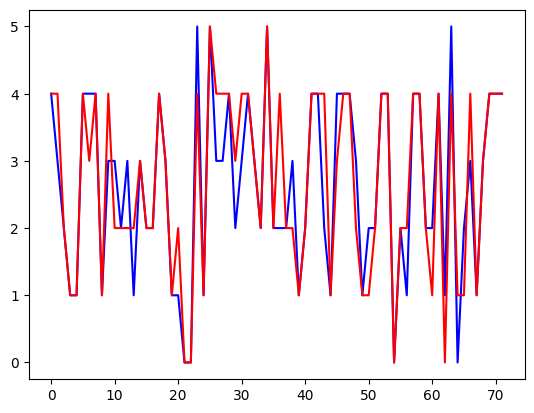

In [ ]:
from matplotlib import pyplot as plt
from keras.models import load_model

predicteur = load_model("result_6cat.h5")

X = X_test

Y = predicteur.predict(X)
notes_predites = np.argmax(Y, axis=1)
notes_reelles = np.argmax(Y_test,axis=1)

axe = range(X_test.shape[0])

plt.plot(axe, notes_reelles,'b',axe, notes_predites,'r')
plt.show()

#Réseau de neurones number 3

On va utiliser différentes hypothèses :


*   Catégories de notes
*   Enlever les zéros



In [ ]:
!wget "https://ressources.magicmakers.fr/wp-content/uploads/2022/09/student-mat.csv"

--2023-05-10 14:59:02--  https://ressources.magicmakers.fr/wp-content/uploads/2022/09/student-mat.csv
Resolving ressources.magicmakers.fr (ressources.magicmakers.fr)... 213.186.33.3, 2001:41d0:1:1b00:213:186:33:3
Connecting to ressources.magicmakers.fr (ressources.magicmakers.fr)|213.186.33.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 41983 (41K) [text/csv]
Saving to: ‘student-mat.csv.5’

student-mat.csv.5   100%[===================>]  41.00K  --.-KB/s    in 0.1s    

2023-05-10 14:59:03 (323 KB/s) - ‘student-mat.csv.5’ saved [41983/41983]



In [ ]:
import pandas as pd

donnees_etudiant = pd.read_csv("student-mat.csv")
donnees_manip = pd.read_csv("student-mat.csv")

donnees_manip = donnees_manip.query("G3 > 0")

for colonne in donnees_manip.columns :
  print(colonne, ":", donnees_manip[colonne].unique())

school : ['GP' 'MS']
sex : ['F' 'M']
age : [18 17 15 16 19 22 20 21]
address : ['U' 'R']
famsize : ['GT3' 'LE3']
Pstatus : ['A' 'T']
Medu : [4 1 3 2 0]
Fedu : [4 1 2 3 0]
Mjob : ['at_home' 'health' 'other' 'services' 'teacher']
Fjob : ['teacher' 'other' 'services' 'health' 'at_home']
reason : ['course' 'other' 'home' 'reputation']
guardian : ['mother' 'father' 'other']
traveltime : [2 1 3 4]
studytime : [2 3 1 4]
failures : [0 3 2 1]
schoolsup : ['yes' 'no']
famsup : ['no' 'yes']
paid : ['no' 'yes']
activities : ['no' 'yes']
nursery : ['yes' 'no']
higher : ['yes' 'no']
internet : ['no' 'yes']
romantic : ['no' 'yes']
famrel : [4 5 3 1 2]
freetime : [3 2 4 1 5]
goout : [4 3 2 1 5]
Dalc : [1 2 5 3 4]
Walc : [1 3 2 4 5]
health : [3 5 1 2 4]
absences : [ 6  4 10  2  0 16 14  7  8 25 12 54 18 26 20 56 24 28  5 13 15 22  3 21
  1 75 30 19  9 11 38 40 23 17]
G1 : [ 5  7 15  6 12 16 14 10 13  8 11  9 17 19 18  3]
G2 : [ 6  5  8 14 10 15 12 18 16 13  9 11  7 19 17]
G3 : [ 6 10 15 11 19  9 12 14 

[0 1]


<Axes: ylabel='Frequency'>

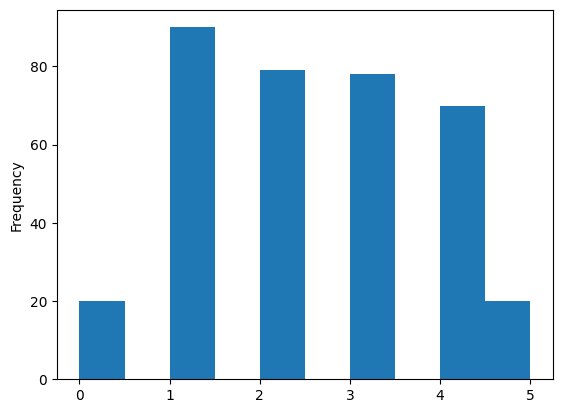

In [ ]:
donnees_manip.loc[donnees_manip["school"] == "GP", ["school"]] = 0
donnees_manip.loc[donnees_manip["school"] == "MS", ["school"]] = 1

print(donnees_manip["school"].unique())

donnees_manip.loc[donnees_manip["G1"] <7, "G1"] = 0
donnees_manip.loc[donnees_manip["G2"] <7, "G2"] = 0
donnees_manip.loc[donnees_manip["G3"] <7, "G3"] = 0

donnees_manip.loc[(donnees_manip["G1"] >= 7) & (donnees_manip["G1"] < 10), "G1"] = 1
donnees_manip.loc[(donnees_manip["G2"] >= 7) & (donnees_manip["G2"] < 10), "G2"] = 1
donnees_manip.loc[(donnees_manip["G3"] >= 7) & (donnees_manip["G3"] < 10), "G3"] = 1

donnees_manip.loc[(donnees_manip["G1"] >= 10) & (donnees_manip["G1"] < 12), "G1"] = 2
donnees_manip.loc[(donnees_manip["G2"] >= 10) & (donnees_manip["G2"] < 12), "G2"] = 2
donnees_manip.loc[(donnees_manip["G3"] >= 10) & (donnees_manip["G3"] < 12), "G3"] = 2

donnees_manip.loc[(donnees_manip["G1"] >= 12) & (donnees_manip["G1"] < 14), "G1"] = 3
donnees_manip.loc[(donnees_manip["G2"] >= 12) & (donnees_manip["G2"] < 14), "G2"] = 3
donnees_manip.loc[(donnees_manip["G3"] >= 12) & (donnees_manip["G3"] < 14), "G3"] = 3

donnees_manip.loc[(donnees_manip["G1"] >= 14) & (donnees_manip["G1"] < 17), "G1"] = 4
donnees_manip.loc[(donnees_manip["G2"] >= 14) & (donnees_manip["G2"] < 17), "G2"] = 4
donnees_manip.loc[(donnees_manip["G3"] >= 14) & (donnees_manip["G3"] < 17), "G3"] = 4

donnees_manip.loc[donnees_manip["G1"] >= 17, "G1"] = 5
donnees_manip.loc[donnees_manip["G2"] >= 17, "G2"] = 5
donnees_manip.loc[donnees_manip["G3"] >= 17, "G3"] = 5

donnees_manip.loc[donnees_manip["absences"]<5, "absences"]=0
donnees_manip.loc[(donnees_manip["absences"]>=5) & (donnees_manip["absences"]<10), "absences"]=1
donnees_manip.loc[(donnees_manip["absences"]>=10) & (donnees_manip["absences"]<20), "absences"]=2
donnees_manip.loc[(donnees_manip["absences"]>=20) & (donnees_manip["absences"]<30), "absences"]=3
donnees_manip.loc[donnees_manip["absences"]>=30, "absences"]=4



donnees_manip["G2"].plot.hist()

In [ ]:
#Pour créer et manipuler des tenseurs :
import numpy as np
#Pour manipuler les étiquettes :
from tensorflow.keras.utils import to_categorical
#Pour séparer les données d'entraînement et d'évaluation
from sklearn.model_selection import train_test_split

##On commence par gérer les sorties
Y = donnees_manip["G3"]

#on utilise la fonction to_categorical() pour transformer les données en vecteurs de probabilités
Y = to_categorical(Y, 6)

##On s'occupe des entrées
X = donnees_manip[["school","absences","traveltime","Fedu","Medu","goout","G1","G2"]]

#On va convertir en tenseur numpy avec la fonction np.asarray() et on va aussi convertir en nombre décimaux
X = np.asarray(X).astype("float32")

##Il nous reste plus qu'à splitter les données avec train_test_split()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

#On regarde si ça a bien marché :
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(285, 8)
(285, 6)
(72, 8)
(72, 6)


##Notre premier réseau de neurones

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

modele = Sequential()

#On va mettre une couche Dense de neurones en entrée
modele.add(Dense(16,input_shape=(8,),activation="relu"))

#on met ensuite une seconde couche intermédiaire
modele.add(Dense(32,activation="relu"))

#On va mettre une couche Dense de sortie
modele.add(Dense(6, activation="softmax"))

modele.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                144       
                                                                 
 dense_7 (Dense)             (None, 32)                544       
                                                                 
 dense_8 (Dense)             (None, 6)                 198       
                                                                 
Total params: 886
Trainable params: 886
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#On va paramétrer son entrainement :
modele.compile(optimizer="Adam",loss="categorical_crossentropy", metrics=["accuracy"])

#On va lancer l'entraînement
modele.fit(X_train, Y_train, batch_size = 16, epochs = 50, validation_data=(X_test,Y_test))

Epoch 1/50
18/18 [==============================] - 3s 31ms/step - loss: 1.7091 - accuracy: 0.2491 - val_loss: 1.6597 - val_accuracy: 0.2639
Epoch 2/50
18/18 [==============================] - 0s 12ms/step - loss: 1.6104 - accuracy: 0.2842 - val_loss: 1.5782 - val_accuracy: 0.3056
Epoch 3/50
18/18 [==============================] - 0s 7ms/step - loss: 1.5325 - accuracy: 0.3860 - val_loss: 1.4978 - val_accuracy: 0.3889
Epoch 4/50
18/18 [==============================] - 0s 7ms/step - loss: 1.4674 - accuracy: 0.4351 - val_loss: 1.4294 - val_accuracy: 0.4167
Epoch 5/50
18/18 [==============================] - 0s 8ms/step - loss: 1.4075 - accuracy: 0.4667 - val_loss: 1.3692 - val_accuracy: 0.4722
Epoch 6/50
18/18 [==============================] - 0s 10ms/step - loss: 1.3487 - accuracy: 0.4982 - val_loss: 1.3124 - val_accuracy: 0.4722
Epoch 7/50
18/18 [==============================] - 0s 4ms/step - loss: 1.2930 - accuracy: 0.5228 - val_loss: 1.2602 - val_accuracy: 0.5000
Epoch 8/50
18/18 

In [ ]:
modele.save("result_6cat.h5")

##On va évaluer avec nos propres yeux !!!
On va utiliser Matplotlib pour faire nos figures

3/3 [==============================] - 0s 3ms/step


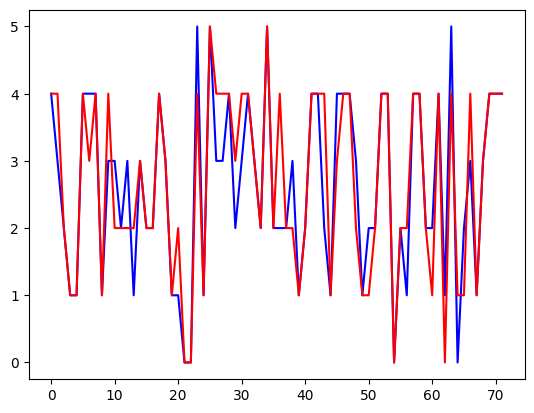

In [ ]:
from matplotlib import pyplot as plt
from keras.models import load_model

predicteur = load_model("result_6cat.h5")

X = X_test

Y = predicteur.predict(X)
notes_predites = np.argmax(Y, axis=1)
notes_reelles = np.argmax(Y_test,axis=1)

axe = range(X_test.shape[0])

plt.plot(axe, notes_reelles,'b',axe, notes_predites,'r')
plt.show()